In [1]:
from sklearn_extra.cluster import KMedoids
import numpy as np

tmp = np.loadtxt("/Documents/MATLAB/kmedoids.csv", dtype=np.str, delimiter=",")
euclideanData = tmp[1:].astype(np.double)

tmp = np.loadtxt("/Documents/MATLAB/dtw.csv", dtype=np.str, delimiter=",")
dtwData = tmp[1:].astype(np.double)

tmp = np.loadtxt("/Documents/MATLAB/wdtw.csv", dtype=np.str, delimiter=",")
wdtwData = tmp[1:].astype(np.double)

In [7]:
import pandas as pd
import math

location = np.loadtxt("/Documents/MATLAB/location.csv", dtype=np.str, delimiter=",")[1:].astype(np.double)
landmark = pd.read_csv("/Documents/MATLAB/landmark.csv").values
goldLabel = np.loadtxt("/Desktop/data/gold_label.csv", dtype=np.int, delimiter=",")
landmarks = []
true = []

for item in landmark:
    temp = item[0].split(",")
    str2 = temp[0][1:]
    str1 = temp[1][1:-1]
    landmarks.append([float(str1),float(str2)])
landmark = np.array(landmarks)

for item in goldLabel:
    tempLabel = item[1]
    true.append(int(tempLabel))
    

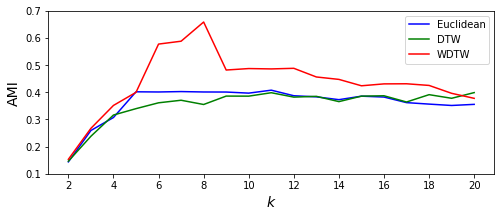

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


euclideanAMI = [metrics.adjusted_mutual_info_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(euclideanData).labels_) for k in range(2, 21)]
dtwAMI = [metrics.adjusted_mutual_info_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(dtwData).labels_) for k in range(2, 21)]
wdtwAMI = [metrics.adjusted_mutual_info_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(wdtwData).labels_) for k in range(2, 21)]



plt.figure(figsize=(8, 3))
plt.plot(range(2, 21), [i for i in euclideanAMI], "b-", label="Euclidean")
plt.plot(range(2, 21), [i for i in dtwAMI], "g-", label="DTW")
plt.plot(range(2, 21), [i for i in wdtwAMI], "r-", label="WDTW")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("AMI", fontsize=14)
plt.xticks(np.arange(2, 21, 2))
plt.yticks(np.arange(0.1, 0.8, 0.1))
plt.legend()
plt.show()

# np.savetxt('/Users/tiger/Desktop/data/bad_AMI.csv', [euclideanAMI, dtwAMI, wdtwAMI], delimiter = ',')
np.savetxt('/Users/tiger/Desktop/data/gold_AMI.csv', [euclideanAMI, dtwAMI, wdtwAMI], delimiter = ',')

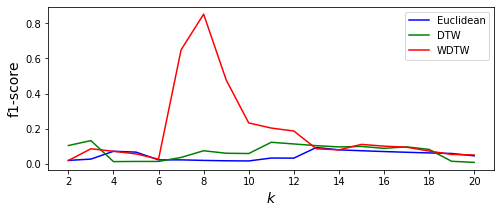

In [10]:
# f1_score1
euclidean_f1_score = [metrics.f1_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(euclideanData).labels_, average="macro") for k in range(2, 21)]
dtw_f1_score = [metrics.f1_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(dtwData).labels_, average="macro") for k in range(2, 21)]
wdtw_f1_score = [metrics.f1_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(wdtwData).labels_, average="macro") for k in range(2, 21)]


plt.figure(figsize=(8, 3))
plt.plot(range(2, 21), [i for i in euclidean_f1_score], "b-", label="Euclidean")
plt.plot(range(2, 21), [i for i in dtw_f1_score], "g-", label="DTW")
plt.plot(range(2, 21), [i for i in wdtw_f1_score], "r-", label="WDTW")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("f1-score", fontsize=14)
plt.xticks(np.arange(2, 21, 2))
# plt.yticks(np.arange(0.1, 0.9, 0.1))
plt.legend()
plt.show()

# np.savetxt('/Users/tiger/Desktop/data/bad_f1-score.csv', [euclidean_f1_score, dtw_f1_score, wdtw_f1_score], delimiter = ',')
np.savetxt('/Users/tiger/Desktop/data/gold_f1-score.csv', [euclidean_f1_score, dtw_f1_score, wdtw_f1_score], delimiter = ',')

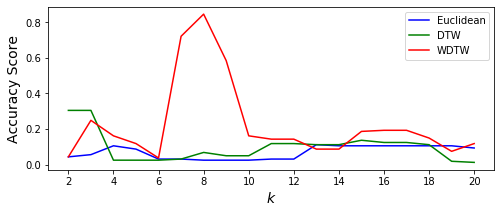

In [11]:
# Accurancy
euclidean_Accurancy = [metrics.accuracy_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(euclideanData).labels_) for k in range(2, 21)]
dtw_Accurancy = [metrics.accuracy_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(dtwData).labels_) for k in range(2, 21)]
wdtw_Accurancy = [metrics.accuracy_score(true, KMedoids(n_clusters=k, metric='precomputed').fit(wdtwData).labels_) for k in range(2, 21)]


plt.figure(figsize=(8, 3))
plt.plot(range(2, 21), [i for i in euclidean_Accurancy], "b-", label="Euclidean")
plt.plot(range(2, 21), [i for i in dtw_Accurancy], "g-", label="DTW")
plt.plot(range(2, 21), [i for i in wdtw_Accurancy], "r-", label="WDTW")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.xticks(np.arange(2, 21, 2))
# plt.yticks(np.arange(0.1, 0.9, 0.1))
plt.legend()
plt.show()

# np.savetxt('/Users/tiger/Desktop/data/bad_accuracy.csv', [euclidean_Accurancy, dtw_Accurancy, wdtw_Accurancy], delimiter = ',')
np.savetxt('/data/gold_accuracy.csv', [euclidean_Accurancy, dtw_Accurancy, wdtw_Accurancy], delimiter = ',')

In [10]:
result = np.array([KMedoids(n_clusters=8, metric='precomputed').fit(wdtwData).labels_]).T

t4 = np.hstack((location, result))
np.savetxt('/data/wdtw8.csv', t4, delimiter = ',')

In [81]:
import pandas as pd
import numpy as np

landmark = pd.read_csv("/Documents/MATLAB/landmark.csv").values
landmarks = []

for item in landmark:
    temp = item[0].split(",")
    str2 = temp[0][1:]
    str1 = temp[1][1:-1]
    landmarks.append([float(str1),float(str2)])
landmark = np.hstack((np.array(landmarks), np.array([[100]*landmark.shape[0]]).T ) )

np.savetxt('/data/landmark_location.csv', landmark, delimiter = ',')

In [84]:
test = np.vstack((t4, landmark))
np.savetxt('/data/total_Location.csv', test, delimiter = ',')

In [8]:
import numpy as np
import pandas as pd
import math

goldLabel = np.loadtxt("Desktop/data/gold_label.csv", dtype=np.double, delimiter=",")
landmark_label = pd.read_csv("Desktop/data/landmarks.csv").values[:,2]

seq = goldLabel[0:161]
landmarks = goldLabel[161:403]

distance = 0.001

label0=[]
label1=[]
label2=[]
label3=[]
label4=[]
label5=[]
label6=[]
label7=[]
totalLabel=[]

for item in seq:
    if(item[2] == 0):
        label0.append(item)
    if(item[2] == 1):
        label1.append(item)
    if(item[2] == 2):
        label2.append(item)
    if(item[2] == 3):
        label3.append(item)
    if(item[2] == 4):
        label4.append(item)
    if(item[2] == 5):
        label5.append(item)
    if(item[2] == 6):
        label6.append(item)
    if(item[2] == 7):
        label7.append(item)

totalLabel = np.array([np.array(label0), np.array(label1), np.array(label2), np.array(label3), np.array(label4), np.array(label5), np.array(label6), np.array(label7)])
totalLandmark = []
finalLabel = []

for index, item in enumerate(totalLabel): #item是每一种label
    tempLandmark=[]
    tempLabel=[]
    for location in item: #location是每一种label的一行具体实例
        tempLabel.append(np.hstack((location, [""])))
        for index, mark in enumerate(landmarks):
            if mark[0] > location[0] - distance and mark[0] < location[0] + distance and mark[1] > location[1] - distance and mark[1] < location[1] + distance:
                tempLandmark.append(np.array(np.hstack((mark, landmark_label[index]))))
#                 tempLandmark.append(np.array(mark))
#                 tempLabel.append(np.array(landmark_label[index]))
        
    totalLandmark.append(np.array(tempLandmark))
    finalLabel.append(np.array(tempLabel))
#     LandmarkLabel.append(np.array(tempLabel))

for i in range(0,8):
    np.savetxt('/Desktop/data/gold_label_withlandmark/totalLandmark'+str(i)+'.csv', np.vstack((finalLabel[i], totalLandmark[i])), delimiter = ',' ,fmt='%s')